<a href="https://colab.research.google.com/github/Darius2527/SpamClassifier-Project/blob/main/SpamClassifierProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the dataset
import pandas as pd
df=pd.read_csv("spamclassifier.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#only the first two columns are relevant, so lets remove the rest
df=df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#checking for duplicates
df.duplicated().sum()

403

In [ ]:
#removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#checking number of smap and ham emails
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

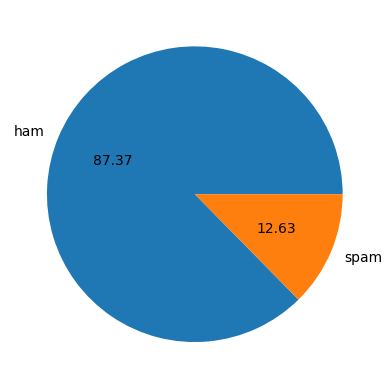

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
#lets try to add a few more features to try and deduce a pattern in the dataset
df['num_chars']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()
#ham emails use an average of 70 characters, 17 words and 2 sentences

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()
#spam emails use an average of 137 characters, 27 words and 3 sentences

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

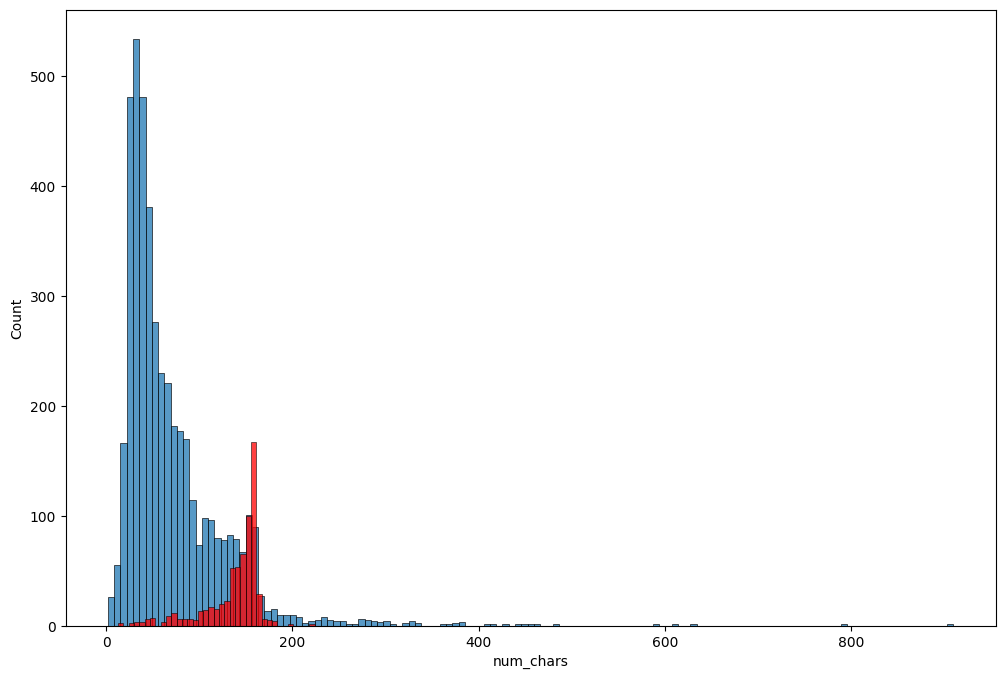

In [ ]:
#lets plot the above data to get a better visualization
plt.figure(figsize=(12,8))
import seaborn as sns
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

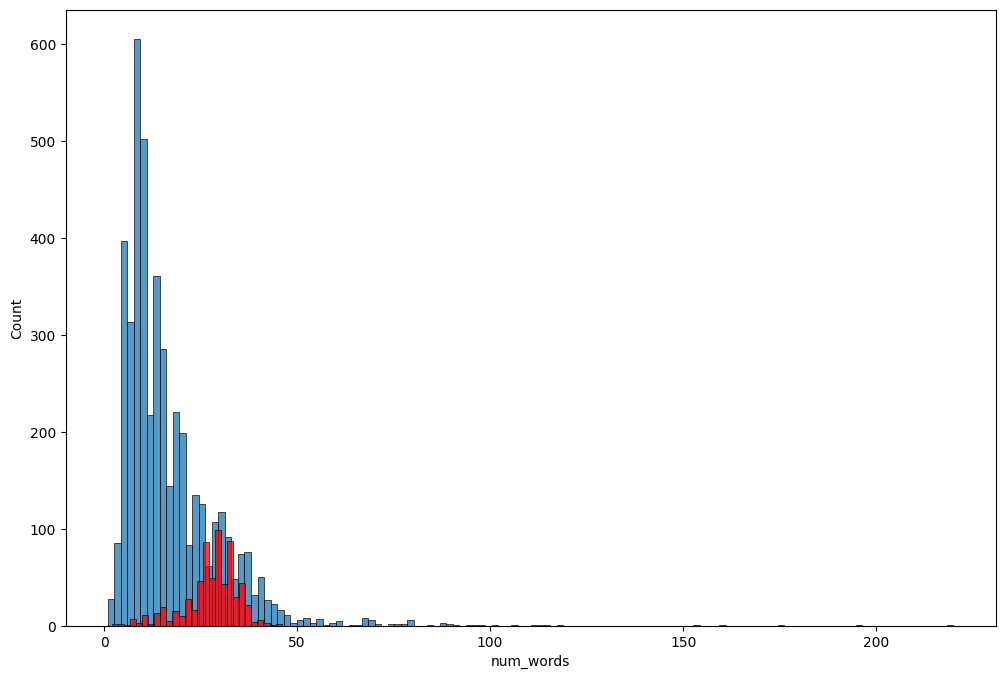

In [ ]:
plt.figure(figsize=(12,8))
import seaborn as sns
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: >

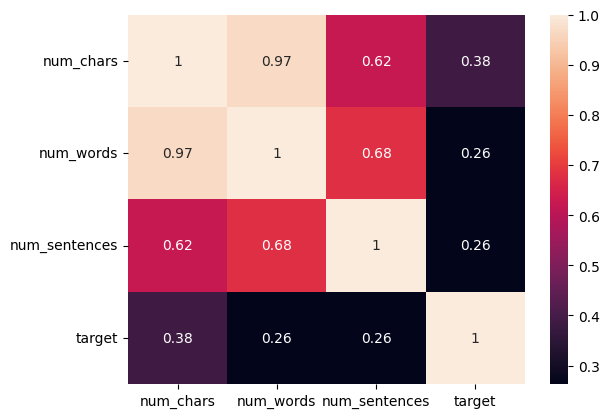

In [ ]:
sns.heatmap(df[['num_chars','num_words','num_sentences','target']].corr(),annot=True)

In [ ]:
#Text preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
for i in range(len(df)):
  review=re.sub('[^a-zA-z]',' ',df['text'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
df=pd.concat([df,pd.DataFrame(corpus,columns=['processed_text'])],axis=1)
df.head()

,target,text,num_chars,num_words,num_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
df=df[['target','num_chars','processed_text']]
df.head()

,target,num_chars,processed_text
0,0,111,go jurong point crazi avail bugi n great world...
1,0,29,ok lar joke wif u oni
2,1,155,free entri wkli comp win fa cup final tkt st m...
3,0,49,u dun say earli hor u c alreadi say
4,0,61,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['processed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

10070

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(10)
#here are the most commonly used words in spam emails

[('call', 346),
 ('free', 197),
 ('p', 158),
 ('u', 157),
 ('txt', 152),
 ('text', 128),
 ('mobil', 121),
 ('ur', 119),
 ('stop', 112),
 ('repli', 104)]

In [ ]:
#initializing and implementing count vectorizer (bag of wrods)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
X=cv.fit_transform(df['processed_text']).toarray()

In [ ]:
X.shape

(5169, 6251)

In [ ]:
Y=df['target']
Y.shape

(5169,)

In [ ]:
Y=Y.values

In [ ]:
#splitting dataset into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#importing naive bayes models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [ ]:
#training models with training dataset
gnb.fit(X_train,Y_train)
mnb.fit(X_train,Y_train)
bnb.fit(X_train,Y_train)

BernoulliNB()

In [ ]:
#pridicting output for test dataset
y_pred_gnb=gnb.predict(X_test)
y_pred_mnb=mnb.predict(X_test)
y_pred_bnb=bnb.predict(X_test)

In [ ]:
#accuracies of the models
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
print("GNB")
print(accuracy_score(Y_test,y_pred_gnb))
print(confusion_matrix(Y_test,y_pred_gnb))
print(classification_report(Y_test,y_pred_gnb))
print(precision_score(Y_test,y_pred_gnb))
GNB_precision_cv=precision_score(Y_test,y_pred_gnb)
print("MNB")
print(accuracy_score(Y_test,y_pred_mnb))
print(confusion_matrix(Y_test,y_pred_mnb))
print(classification_report(Y_test,y_pred_mnb))
print(precision_score(Y_test,y_pred_mnb))
MNB_precision_cv=precision_score(Y_test,y_pred_mnb)
print("BNB")
print(accuracy_score(Y_test,y_pred_bnb))
print(confusion_matrix(Y_test,y_pred_bnb))
print(classification_report(Y_test,y_pred_bnb))
print(precision_score(Y_test,y_pred_bnb))
BNB_precision_cv=precision_score(Y_test,y_pred_bnb)

GNB
0.8810444874274661
[[793 103]
 [ 20 118]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034

0.5339366515837104
MNB
0.9700193423597679
[[874  22]
 [  9 129]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       896
           1       0.85      0.93      0.89       138

    accuracy                           0.97      1034
   macro avg       0.92      0.96      0.94      1034
weighted avg       0.97      0.97      0.97      1034

0.8543046357615894
BNB
0.9758220502901354
[[890   6]
 [ 19 119]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.86      0.90       138

    ac

In [ ]:
#now let us do the same with tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [ ]:
X_tfidf=tfidf.fit_transform(df['processed_text']).toarray()
X_tfidf.shape

(5169, 6251)

In [ ]:
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf=train_test_split(X_tfidf,Y,test_size=0.2,random_state=2)

In [ ]:
gnb.fit(X_train_tfidf,Y_train_tfidf)
mnb.fit(X_train_tfidf,Y_train_tfidf)
bnb.fit(X_train_tfidf,Y_train_tfidf)

BernoulliNB()

In [ ]:
y_pred_gnb_tfidf=gnb.predict(X_test_tfidf)
y_pred_mnb_tfidf=mnb.predict(X_test_tfidf)
y_pred_bnb_tfidf=bnb.predict(X_test_tfidf)

In [ ]:

print("GNB")
print(accuracy_score(Y_test_tfidf,y_pred_gnb_tfidf))
print(confusion_matrix(Y_test_tfidf,y_pred_gnb_tfidf))
print(classification_report(Y_test_tfidf,y_pred_gnb_tfidf))
print(precision_score(Y_test_tfidf,y_pred_gnb_tfidf))
GNB_precision_tfidf=precision_score(Y_test_tfidf,y_pred_gnb_tfidf)
print("MNB")
print(accuracy_score(Y_test_tfidf,y_pred_mnb_tfidf))
print(confusion_matrix(Y_test_tfidf,y_pred_mnb_tfidf))
print(classification_report(Y_test_tfidf,y_pred_mnb_tfidf))
print(precision_score(Y_test_tfidf,y_pred_mnb_tfidf))
MNB_precision_tfidf=precision_score(Y_test_tfidf,y_pred_mnb_tfidf)
print("BNB")
print(accuracy_score(Y_test_tfidf,y_pred_bnb_tfidf))
print(confusion_matrix(Y_test_tfidf,y_pred_bnb_tfidf))
print(classification_report(Y_test_tfidf,y_pred_bnb_tfidf))
print(precision_score(Y_test_tfidf,y_pred_bnb_tfidf))
BNB_precision_tfidf=precision_score(Y_test_tfidf,y_pred_bnb_tfidf)

GNB
0.8762088974854932
[[793 103]
 [ 25 113]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.52      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.88      0.89      1034

0.5231481481481481
MNB
0.9622823984526112
[[896   0]
 [ 39  99]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.72      0.84       138

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

1.0
BNB
0.9758220502901354
[[890   6]
 [ 19 119]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.86      0.90       138

    accuracy         

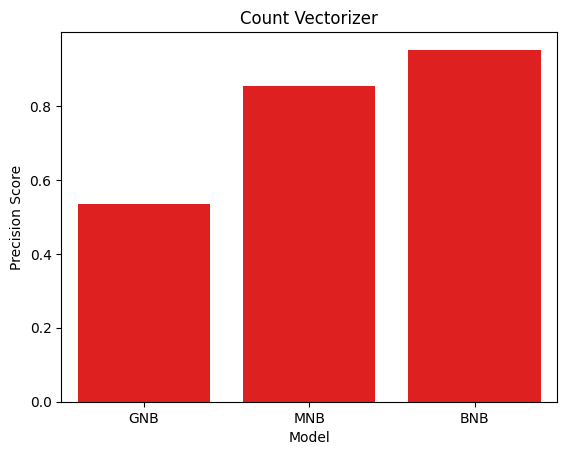

In [ ]:
#lets try to compare the three models when count vectorizer was used and tfidf was used
sns.barplot(x=['GNB','MNB','BNB'],y=[GNB_precision_cv,MNB_precision_cv,BNB_precision_cv],color='red')
plt.title('Count Vectorizer')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.show()
#Count vectorizer worked best for binomialNB

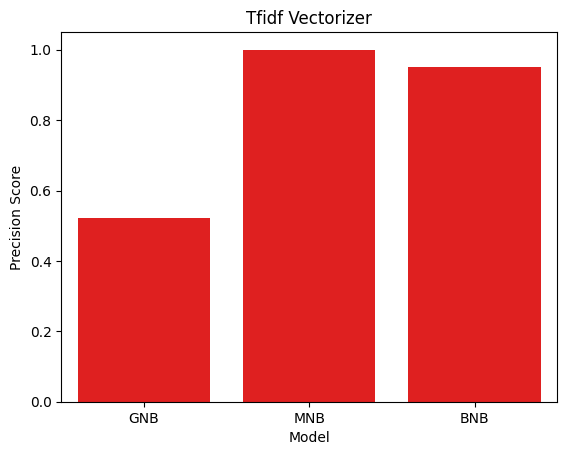

In [ ]:
sns.barplot(x=['GNB','MNB','BNB'],y=[GNB_precision_tfidf,MNB_precision_tfidf,BNB_precision_tfidf],color='red')
plt.title('Tfidf Vectorizer')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.show()
#TFIDF worked best for multinomialNB

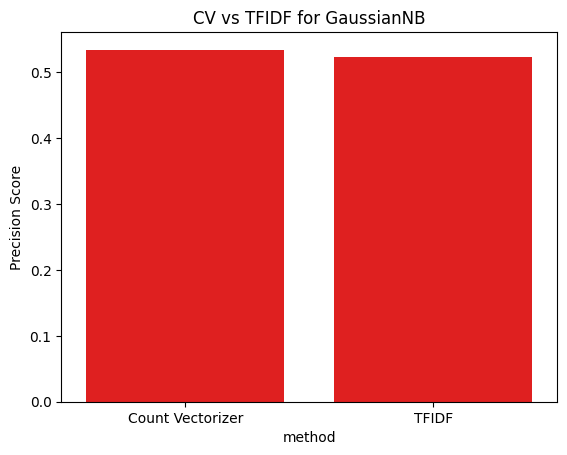

In [ ]:
#now let us compare count vectorizer and TFIDF for all models
sns.barplot(x=['Count Vectorizer','TFIDF'],y=[GNB_precision_cv,GNB_precision_tfidf],color='red')
plt.title('CV vs TFIDF for GaussianNB')
plt.xlabel('method')
plt.ylabel('Precision Score')
plt.show()

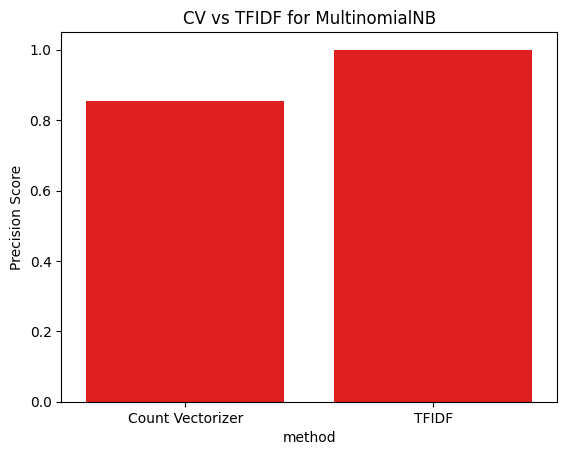

In [ ]:
sns.barplot(x=['Count Vectorizer','TFIDF'],y=[MNB_precision_cv,MNB_precision_tfidf],color='red')
plt.title('CV vs TFIDF for MultinomialNB')
plt.xlabel('method')
plt.ylabel('Precision Score')
plt.show()

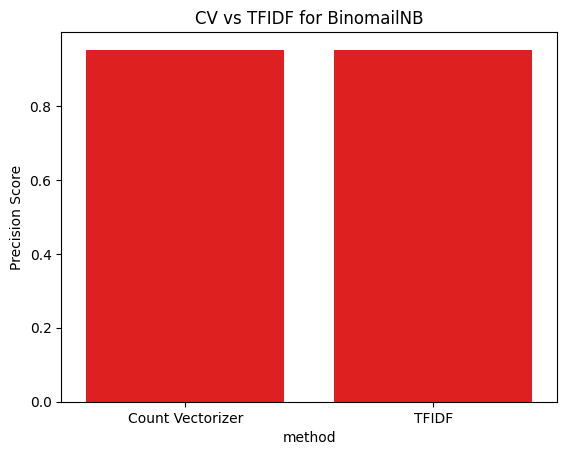

In [ ]:
sns.barplot(x=['Count Vectorizer','TFIDF'],y=[BNB_precision_cv,BNB_precision_tfidf],color='red')
plt.title('CV vs TFIDF for BinomailNB')
plt.xlabel('method')
plt.ylabel('Precision Score')
plt.show()

In [ ]:
#we cannot come to a conclusion as to which model or which NLP method works better
#count vectorizer worked better for GaussianNB
#TFIDF gave better precision for MultinomailNB
#both were equally effective with BinomialNB